# Analysis of Zenodo data

## Import of packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading data

In [2]:
datasets = pd.read_csv("datasets.tsv", sep="\t")
files = pd.read_csv("files.tsv", sep="\t")

C:\Users\bouar\miniconda3\envs\jupyterlab\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [111]:
tab = pd.merge(datasets, files, on=["dataset_id", "origin"])

In [4]:
tab.head()
#print(len(tab))

,dataset_id,origin,doi,date_creation,date_last_modified,date_fetched,file_number,download_number,view_number,access_right,...,title,author,keywords,file_type,file_size,file_md5,from_zip_file,file_name,file_url,origin_zip_file
0,3604282,zenodo,10.5281/zenodo.3604282,2020-01-10,2020-01-24,2021-12-29T18:55:41,22,101,8,open,...,Small membranes crowded with proteins at diffe...,"Javanainen, Matti",NaN,cpt,4.094080e+05,8d199727fe137886cc582781ba64d604,False,M-4-400-300.cpt,https://zenodo.org/api/files/79746ec1-ad28-4e6...,None
1,3604282,zenodo,10.5281/zenodo.3604282,2020-01-10,2020-01-24,2021-12-29T18:55:41,22,101,8,open,...,Small membranes crowded with proteins at diffe...,"Javanainen, Matti",NaN,edr,1.344147e+07,989fa719a1a9986b24b4b4dd18dfa8a5,False,M-4-400-300.edr,https://zenodo.org/api/files/79746ec1-ad28-4e6...,None
2,3604282,zenodo,10.5281/zenodo.3604282,2020-01-10,2020-01-24,2021-12-29T18:55:41,22,101,8,open,...,Small membranes crowded with proteins at diffe...,"Javanainen, Matti",NaN,gro,1.171116e+06,4edcd5d462aca6374a3804835d796646,False,M-4-400-300.gro,https://zenodo.org/api/files/79746ec1-ad28-4e6...,None
3,3604282,zenodo,10.5281/zenodo.3604282,2020-01-10,2020-01-24,2021-12-29T18:55:41,22,101,8,open,...,Small membranes crowded with proteins at diffe...,"Javanainen, Matti",NaN,tpr,8.403920e+05,c36a4260a857a38f73a78693a44b7828,False,M-4-400-300.tpr,https://zenodo.org/api/files/79746ec1-ad28-4e6...,None
4,3604282,zenodo,10.5281/zenodo.3604282,2020-01-10,2020-01-24,2021-12-29T18:55:41,22,101,8,open,...,Small membranes crowded with proteins at diffe...,"Javanainen, Matti",NaN,xtc,1.177116e+09,4a5b38d1b65136d7d1538ac5e36ee436,False,M-4-400-300.xtc,https://zenodo.org/api/files/79746ec1-ad28-4e6...,None


## New columns in the dataframe

In [93]:
ext_gromacs = ["tpr", "gro", "mdp", "itp", "ndx", "top", "xtc", "trr", "edr", "cpt"]
ext_namd = ["psf", "inp", "prm", "crd", "dcd", "coor", "vel", "xsc"]
ext_amber = ["prmtop", "inpcrd", "mdcrd", "nc", "ncdf", "trj"]

In [112]:
engine_MD = []
for ext in tab["file_type"]:
    if ext in ext_gromacs:
        engine_MD.append("gromacs")
    elif ext in ext_namd:
        engine_MD.append("namd")
    elif ext in ext_amber:
        engine_MD.append("amber")
    else:
        engine_MD.append("none")

#print(len(engine_MD))
tab["engine_MD"] = engine_MD

In [113]:
years = []
for date in tab["date_creation"]:
    years.append(int(date[:4]))

#print(len(years))
tab["years"] = years

## Analysis

### Number of extensions per MD engine

In [62]:
tab["engine_MD"].value_counts().plot(kind = "bar")

KeyError: 'engine_MD'

### Number of files per years

<AxesSubplot:>

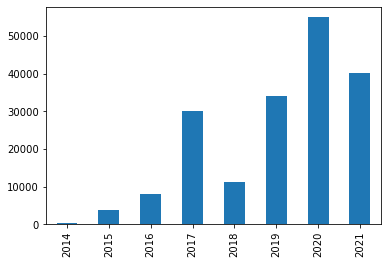

In [9]:
tab["years"].value_counts().sort_index().plot(kind = "bar")

### Number of files per years

<AxesSubplot:>

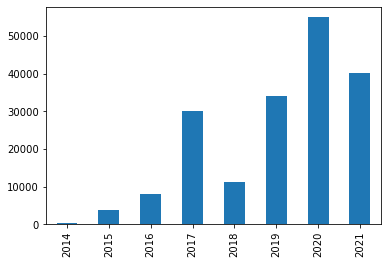

In [26]:
tab["years"].value_counts().sort_index().plot(kind = "bar")

<AxesSubplot:xlabel='years'>

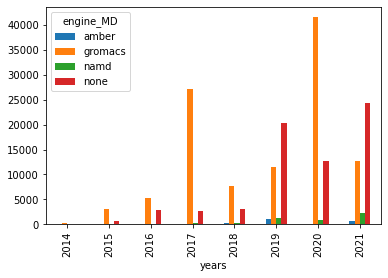

In [27]:
tab.groupby(['years', 'engine_MD']).size().unstack().plot.bar()

<AxesSubplot:xlabel='years'>

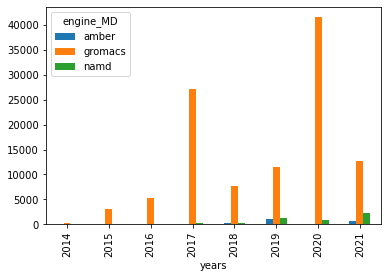

In [32]:
data_engine_years = pd.DataFrame({"years":tab["years"], "engine_MD":tab["engine_MD"]})
index = data_engine_years[data_engine_years["engine_MD"] == "none"].index
data_engine_years.drop(index, inplace=True)

data_engine_years.groupby(['years', 'engine_MD']).size().unstack().plot.bar()

### Number of files per filetype

#### For Gromacs :

In [110]:
index = []
for i in tab.index:
    if tab.at[i, "file_type"] not in ext_gromacs:
        index.append(i)

In [119]:
data_gromacs = tab.copy()
data_gromacs = data_gromacs.drop(index)

<AxesSubplot:>

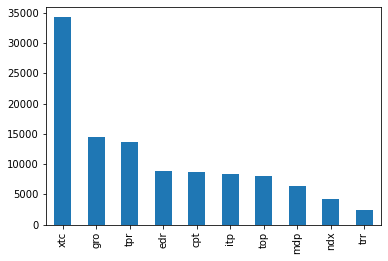

In [121]:
data_gromacs["file_type"].value_counts().plot(kind = "bar")

#### For Namd :

<AxesSubplot:>

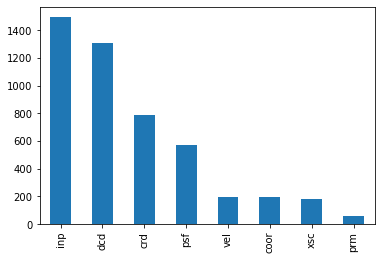

In [124]:
index = []
for i in tab.index:
    if tab.at[i, "file_type"] not in ext_namd:
        index.append(i)
        
data_namd = tab.copy()
data_namd = data_namd.drop(index)

data_namd["file_type"].value_counts().plot(kind = "bar")

#### For Amber :

<AxesSubplot:>

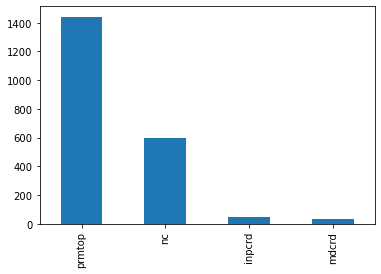

In [125]:
index = []
for i in tab.index:
    if tab.at[i, "file_type"] not in ext_amber:
        index.append(i)
        
data_amber = tab.copy()
data_amber = data_amber.drop(index)

data_amber["file_type"].value_counts().plot(kind = "bar")